## Titanic dataset - PCA
    - pca: component수 변화. 분류 정확도 / 설명력

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.drop(columns=['deck', 'class', 'who', 'adult_male', 'embark_town', 'alive', 'alone'], inplace=True)
titanic.age.fillna(titanic.age.mean(), inplace=True)
titanic.embarked.fillna('S', inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
titanic.sex = le.fit_transform(titanic.sex)
titanic.embarked = le.fit_transform(titanic.embarked)

In [7]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
titanic_std = StandardScaler().fit_transform(titanic.iloc[:, 1:].values)

In [9]:
def pca_accuracy_rfc(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2023
    )
    rfc = RandomForestClassifier(random_state=2023)
    rfc.fit(X_train, y_train)
    score = rfc.score(X_test, y_test)
    return score

In [10]:
def pca_accuracy_xgb(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=2023
    )
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    score = xgb.score(X_test, y_test)
    return score

In [11]:
pca2 = PCA(n_components=2, random_state=2023)

In [12]:
tt_pca2 = pca2.fit_transform(titanic_std)

In [13]:
pca2.explained_variance_ratio_, pca2.explained_variance_ratio_.sum()

(array([0.26480442, 0.24518892]), 0.5099933454669009)

In [14]:
for n in [1,2,3,4,5,6,7]:
    pca = PCA(n_components=n)
    tt_pca = pca.fit_transform(titanic_std)
    explained = sum(pca.explained_variance_ratio_)
    accuracy = pca_accuracy_rfc(tt_pca, titanic.survived)
    print(f'PCA{n}: 설명력-{explained:.4f}, 정확도-{accuracy:.4f}')

PCA1: 설명력-0.2648, 정확도-0.6704
PCA2: 설명력-0.5100, 정확도-0.7542
PCA3: 설명력-0.6513, 정확도-0.7654
PCA4: 설명력-0.7716, 정확도-0.7430
PCA5: 설명력-0.8678, 정확도-0.7542
PCA6: 설명력-0.9475, 정확도-0.7654
PCA7: 설명력-1.0000, 정확도-0.7709


In [15]:
for n in [1,2,3,4,5,6,7]:
    pca = PCA(n_components=n)
    tt_pca = pca.fit_transform(titanic_std)
    explained = sum(pca.explained_variance_ratio_)
    accuracy = pca_accuracy_xgb(tt_pca, titanic.survived)
    print(f'PCA{n}: 설명력-{explained:.4f}, 정확도-{accuracy:.4f}')

PCA1: 설명력-0.2648, 정확도-0.6983
PCA2: 설명력-0.5100, 정확도-0.7486
PCA3: 설명력-0.6513, 정확도-0.7765
PCA4: 설명력-0.7716, 정확도-0.7542
PCA5: 설명력-0.8678, 정확도-0.7598
PCA6: 설명력-0.9475, 정확도-0.7542
PCA7: 설명력-1.0000, 정확도-0.7598


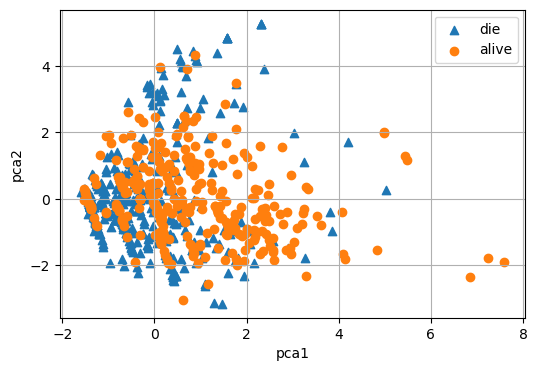

In [31]:
pca2 = PCA(n_components=2)
titanic_pca2 = pca2.fit_transform(titanic_std)
titanic_df = pd.DataFrame(titanic_pca2, columns=['pca1', 'pca2'])
titanic_df['survived'] = titanic.survived
markers = ['^', 'o']
plt.figure(figsize=(6,4))
for i, marker in enumerate(markers):
    x_data = titanic_df[titanic_df.survived == i]['pca1']
    y_data = titanic_df[titanic_df.survived == i]['pca2']
    plt.scatter(x_data, y_data, marker=marker, label=('alive' if i == 1 else 'die'))
plt.grid(), plt.legend()
plt.xlabel('pca1'), plt.ylabel('pca2');